
# STAT 207: EM Algorithm

The EM algorithm [Dempster et al., 1977](https://scholar.google.com/scholar?q=Maximum+likelihood+from+incomplete+data+via+the+EM+algorithm&hl=en) is one of the top (over 73,000) most cited statistics papers of all time.

- Kaplan–Meier estimator, Cox model, FDR control, Bootstrap methods;

- Random Forests, Support Vector Machines (SVMs), Bagging Predictors, Gradient Boosting Machines.

Maximum likelihood is (was) the dominant form of estimation in applied statistics.

At the heart of every EM algorithm is some notion of **missing data**. 

- Data can be missing in the ordinary sense of a failure to record certain observations on certain cases. 

- Data can also be missing in a theoretical sense. 

- The E (expectation) step is to fill in the missing data (This action replaces the loglikelihood of the observed data by a minorizing function). 

- The M step maximizes the simpler minorizing function (analytically). 


## Expectation Maximization (EM) Algorithm

--- 

**Input:** Data $X$, model parameters $\theta$, number of iterations $T$

**Output:** Maximum likelihood estimate of the parameters $\theta$, where $p(X,Z|\theta)$ is the density of the complete data

1. Initialize the parameters $\theta^{(0)}$
2. For $t=1,2,...,T$
    * **E-Step:** Compute the conditional expectation of the complete-data log-likelihood function:
    $$Q(\theta,\theta^{(t-1)}) = E_{Z|X,\theta^{(t-1)}}[ \log p(X,Z|\theta)]$$
    where $Z$ is the latent variable.
    * **M-Step:** Compute the parameters that maximize the conditional expectation computed in step 2:
    $$\theta^{(t)} = \arg\max_\theta Q(\theta,\theta^{(t-1)})$$
3. Return the estimated parameters $\theta^{(T)}$

---



<div>
<img src="EM.jpg" alt="EM" style="width: 500px;"/>
</div>

\begin{center}
\includegraphics[width=0.8\textwidth]{EM.jpg}
\end{center}

Let $\log g(y|\theta)$ denote the loglikelihood of the observed data, then the EM algorithm enjoys the **ascent property** (proof not required)
$$
\log g(y|\theta^{(t)}) \ge \log g(y|\theta^{(t-1)}).
$$


- Applications of EM:
finite mixture model, HMM (Baum-Welch algorithm), factor analysis, variance components model aka linear mixed model (LMM), hyper-parameter estimation in empirical Bayes procedure $\max_\alpha \int f(y|\theta)\pi(\theta|\alpha)d\theta$, missing data, group/censorized/truncated model, ...
 
**Remarks**

- EM algorithm often converges at an excruciatingly slow rate in a neighborhood of the maximum point. 

- This rate directly reflects the amount of missing data in a problem. 

- In the absence of concavity, there is also no guarantee that the EM algorithm will converge to the global maximum. 

- The global maximum can usually be reached by starting the parameters at good but suboptimal estimates such as method-of-moments estimates or by choosing multiple random starting points.




## Canonical EM Example: Finite Mixture Models

- Consider the Gaussian finite mixture model with density:
$$
h(\mathbf{y})=\sum_{j=1}^{k} \pi_j h_j(\mathbf{y} \mid \boldsymbol{\mu_j}, \Omega_j), \mathbf{y} \in \mathbb{R}^d,
$$
where

$$
h_j(\mathbf{y} \mid \boldsymbol{\mu_j}, \Omega_j)=\frac{1}{(2\pi)^{d/2} \left|\Omega_j\right|^{1/2}} \exp\left(-\frac{1}{2}(\mathbf{y}-\boldsymbol{\mu_j})^T\Omega_j^{-1}(\mathbf{y}-\boldsymbol{\mu_j})\right)
$$

are densities of multivariate normals $N_d(\boldsymbol{\mu_j}, \Omega_j)$.

- Given iid data points $\mathbf{y}_1,\ldots,\mathbf{y}_n$, we want to estimate parameters 
$$\boldsymbol{\theta}=(\pi_1,\ldots,\pi_k,\boldsymbol{\mu}_1,\ldots,\boldsymbol{\mu}_k,\boldsymbol{\Omega}_1,\ldots,\boldsymbol{\Omega}_k)$$ 
subject to the constraints $\pi_j \geq 0,\,\sum_{j=1}^k \pi_j = 1,\, \boldsymbol{\Omega}_j \succeq 0$.

- The (Incomplete) data log-likelihood is
$$
\begin{aligned}
\ln g(\mathbf{y}_1, \ldots, \mathbf{y}_n \mid \theta) &= \sum_{i=1}^n \ln h(\mathbf{y}_i) \\
&= \sum_{i=1}^n \ln\left(\sum_{j=1}^k \pi_j h_j(\mathbf{y}_i \mid \boldsymbol{\mu}_j,\boldsymbol{\Omega}_j)\right) 
\end{aligned}
$$

- Let $\textbf{z}_{ij} = I\{\textbf{y}_i \text{ comes from group } j\}$ be the missing data. The complete data likelihood is
$$
f(\textbf{y}, \textbf{z} \mid \theta) = \prod_{i=1}^n \prod_{j=1}^k [\pi_j h_j(\textbf{y}_i \mid \boldsymbol{\mu}_j,\boldsymbol{\Omega}_j)]^{z_{ij}}.
$$

And thus the complete log-likelihood is
$$
\ln f(\textbf{y}, \textbf{z} \mid \theta) = \sum_{i=1}^n \sum_{j=1}^k z_{ij}[\ln \pi_j + \ln h_j(\textbf{y}_i \mid \boldsymbol{\mu}_j,\boldsymbol{\Omega}_j)]
$$

- **E step:** the conditional expectation is
$$
\mathcal{Q}(\theta|\theta^{(t)}) = \mathbb{E}\left[\sum_{i=1}^n\sum_{j=1}^k z_{ij}\big(\ln\pi_j+\ln h_j(y_i|\mu_j,\Omega_j)\big) \bigg|\ \mathbf{Y}=\mathbf{y}, \pi^{(t)}, \mu_1^{(t)},..,\mu_k^{(t)}, \Omega_1^{(t)},..,\Omega_k^{(t)} \right] 
$$
By Bayes' rule, we have
$$
w^{(t)}_{ij} := \mathbb{E}[z_{ij} \mid y, \pi^{(t)}, \mu^{(t)}_1,\ldots,\mu^{(t)}_k,\Omega^{(t)}_1,\ldots,\Omega^{(t)}_k] = \frac{\pi^{(t)}_j h_j(y_i \mid \mu^{(t)}_j, \Omega^{(t)}_j)}{\sum_{j'=1}^k \pi^{(t)}_{j'}h_{j'}(y_i \mid \mu^{(t)}_{j'}, \Omega^{(t)}_{j'})}.
$$

And the Q function becomes
$$
Q(\theta|\theta(t)) = \sum_{i=1}^{n}\sum_{j=1}^{k} w^{(t)}_{ij} \ln\pi_j + \sum_{i=1}^{n}\sum_{j=1}^{k} w^{(t)}_{ij} \left[-\frac{1}{2}\ln\text{det}\,\Omega_j - \frac{1}{2}(\mathbf{y}_i - \mu_j)^{\top}\Omega_j^{-1}(\mathbf{y}_i - \mu_j)\right].
$$

- **M step:** the maximizer of the Q function gives the next iterate:
$$
\begin{aligned}
\pi_{j}^{(t+1)} &= \frac{\sum_{i=1}^{n} w_{ij}^{(t)} }{n} \\
\mu_{j}^{(t+1)} &= \frac{\sum_{i=1}^{n} w_{ij}^{(t)} y_i}{\sum_{i=1}^{n} w_{ij}^{(t)}}  \\
\Omega_j^{(t+1)} &= \frac{\sum_{i=1}^{n} w_{ij}^{(t)} (y_i - \mu_{j}^{(t+1)}) (y_i - \mu_{j}^{(t+1)})^{T} }{\sum_{i=1}^{n} w_{ij}^{(t)}}.
\end{aligned}
$$
See NAS Example 11.2.3 for more details to get multivariate normal MLE and Example 11.3.1 for multinomial MLE.

- The EM update is much simpler than Newton type algorithms.

- Parallel computing with the EM algorithm: [Suchard et al. (2010) GPU Programming](https://www.tandfonline.com/doi/abs/10.1198/jcgs.2010.10016)

In [1]:
import numpy as np
from scipy.stats import norm

def em_gmm(data, num_components, num_iterations):
    # initialize parameters
    num_data_points = len(data)
    weights = np.ones(num_components) / num_components
    means = np.random.choice(data, num_components)
    variances = np.ones(num_components)

    # run EM algorithm
    for i in range(num_iterations):
        # E-step
        posteriors = np.zeros((num_data_points, num_components))
        for j in range(num_components):
            posteriors[:, j] = weights[j] * norm.pdf(data, loc=means[j], scale=np.sqrt(variances[j]))
        posteriors = posteriors / np.sum(posteriors, axis=1)[:, np.newaxis]

        # M-step
        weights = np.sum(posteriors, axis=0) / num_data_points
        means = np.sum(posteriors * data[:, np.newaxis], axis=0) / np.sum(posteriors, axis=0)
        variances = np.sum(posteriors * (data[:, np.newaxis] - means)**2, axis=0) / np.sum(posteriors, axis=0)

    return weights, means, variances


In [2]:
import matplotlib.pyplot as plt

np.random.seed(23)  # for reproducibility

# Define parameters
n = 1000
proportions = [0.7, 0.3]
means = [0, 3]
variances = [1, 0.5]

# Simulate data
data = np.concatenate([
    np.random.normal(means[0], np.sqrt(variances[0]), size=int(n*proportions[0])),
    np.random.normal(means[1], np.sqrt(variances[1]), size=int(n*proportions[1]))
])

# Shuffle data
np.random.shuffle(data)

print(data[:10])  # print first 10 data points

[ 0.67014016  3.58851298 -1.68094949  2.04890351  2.26705593  1.69035481
  0.32354564  3.23721252  0.6752006   0.43782968]


[0.30743377 0.69256623]
[ 2.92089639 -0.0772751 ]
[0.51007664 0.89783908]


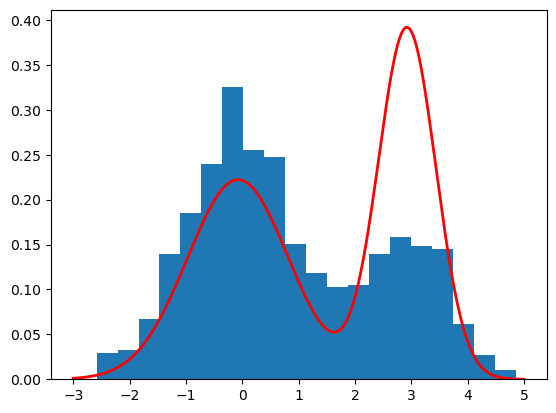

In [3]:
# run the EM algorithm
wts, mu, sigma = em_gmm(data, 2, 100)

print(wts)
print(mu)
print(sigma)
# plot the data and the fitted Gaussians
x = np.linspace(-3, 5, 1000)
y = np.zeros_like(x)
for j in range(2):
    y += norm.pdf(x, mu[j], sigma[j]) / 2
plt.hist(data, bins=20, density=True)
plt.plot(x, y, color='red', linewidth=2)
plt.show()

## Bayesian EM

- Assume the prior $\pi(\theta)$ and the logposterior is $L(\theta) + \ln \pi(\theta)$.

- Define the Q function as
$$
\begin{aligned}
Q(\theta|\theta_{n}) = \mathbb{E}[\ln f(X|\theta) + \ln \pi(\theta)|Y,\theta_{n}] \\
= \mathbb{E}[\ln f(X|\theta)|Y,\mathbf{n}] + \ln \pi(\theta).
\end{aligned}
$$

- Simply add $\ln \pi(\theta)$ to the usual E step.

- Often minorize $\ln \pi(\theta)$ in the M step.

### Allele Frequency Estimation

- The ABO locus exhibits the three alleles A, B, and O and the four observable phenotypes A, B, AB, and O.

- Dominance amounts to a masking of the O allele by the presence of an A or B allele.

- A person with phenotype A can potentially have genotype of either A/O or A/A.

- Total of $n = 521$ duodenal ulcer patients, a total of $n_A = 186$ had phenotype A, $n_B = 38$ had phenotype B, $n_{AB} = 13$ had phenotype AB, and $n_O = 284$ had phenotype O.

- We want to estimate the frequencies $p_A, p_B$, and $p_O$, with the constraint
$$
p_A + p_B + p_O = 1,
$$
 and the underlying six genotype counts $n_{A/A}, n_{A/O}, n_{B/B}, n_{B/O}, n_{A/B} = n_{AB}$, and $n_{O/O} = n_O$ as the complete data $X$.


- The complete data loglikelihood is
$$
\begin{aligned}
\ln f(X|p) =& n_{A/A}\ln p_A^2 + n_{A/O}\ln(2p_Ap_O) + n_{B/B}\ln p_B^2 \\
& + n_{B/O}\ln(2p_Bp_O) + n_{AB}\ln(2p_Ap_B) + n_O\ln p_O^2 \\
& + \ln {n \choose n_{A/A} n_{A/O} n_{B/B} n_{B/O} n_{AB} n_O}.
\end{aligned}
$$

- **E step:** with the current parameter vector $p_m =(p_{mA}, p_{mB}, p_{mO})$, further we have
$$
\begin{aligned}
{n_{mA/A}} = E\left(n_{A/A} \mid Y, p_m \right) = n_A\frac{p^2_{mA}}{p^2_{mA} + 2p_{mA} p_{mo} } \\
{n_{mA/O}} = E\left(n_{A/O} \mid Y, p_m \right) = n_A\frac{2p_{mA} p_{mo}}{p^2_{mA} + 2p_{mA} p_{mo} } 
\end{aligned}
$$
and similarly for ${n_{mB/B}}$ and ${n_{mB/O}}$

- **M step:**  maximizes the $Q(p \mid p_m)$ function derived from the complete data loglikelihood, the stationary point of the lagrangian yields
$$
p_{m+1,A} = \frac{2n_{mA/A} + n_{mA/O} + n_{AB}}{2n}
$$ 

$$
p_{m+1,B} = \frac{2n_{mB/B} + n_{mB/O} + n_{AB}}{2n}
$$ 

$$
p_{m+1,O} = \frac{n_{mA/O} + n_{mB/O} + 2n_O}{2n}
$$

- Now we add the Dirichlet distribution as the prior to the multinomial distribution,
$$
\frac{\Gamma(\alpha_{A} + \alpha_{B} + \alpha_{O})}{\Gamma(\alpha_{A}) \Gamma(\alpha_{B}) \Gamma(\alpha_{O})} \prod_{i=A,B,O} p_{i}^{\alpha_{i}-1}
$$
 and the posterior update becomes 
$$
p_{m+1,A} = \frac{2n_{mA/A} + n_{mA/O} + n_{AB} + \alpha_A - 1}{2n+ \alpha - 3}
$$

## Generalizations of EM - difficult M steps

### Expectation Conditional Maximization (ECM)

- [Meng and Rubin (1993)](https://academic.oup.com/biomet/article-abstract/80/2/267/251605).

- In some problems the M step is difficult (no analytic solution).

- Conditional maximization is easy (block ascent).

    - partition the parameter vector into blocks $\theta = (\theta_1, ..,\theta_B)$

    - alternatively update $\theta_b, b=1,2,..,B$
    
- The ascent property still holds. Why?

- ECM may converge slower than EM (more iterations) but the total computer time may be shorter due to ease of the CM step.

###  ECM Either (ECME)

- [Liu and Rubin (1994)](https://academic.oup.com/biomet/article-abstract/81/4/633/224325).

- Each CM step maximizes either the Q function or the original incomplete observed log-likelihood.

- The ascent property still holds. Why?

- Faster convergence than ECM.

###  Alternating ECM (AECM)

- [Meng and van Dyk (1997)](https://academic.oup.com/jrsssb/article/59/3/511/7083070).

- The specification of the complete-data is allowed to be different on each CM-step.

- The ascent property still holds. Why?

### Example: multivariate t-distribution

- $\mathbf{W} \in \mathbb{R}^{p}$ is a multivariate $t$-distribution $t_p(\boldsymbol{\mu}, \boldsymbol{\Sigma}, \nu)$ if $\mathbf{W} \sim N(\boldsymbol{\mu}, \boldsymbol{\Sigma}/u)$ and $u \sim \text{gamma}(\nu/2, \nu/2)$.

- Recall the $\text{gamma}(\alpha,\beta)$ density is
$$
f(u|\alpha,\beta)=\frac{\beta^{\alpha} u^{\alpha-1}}{\Gamma(\alpha)} e^{-\beta u}, \quad u \geq 0.
$$

- Given iid data $\boldsymbol{w}_1, \ldots, \boldsymbol{w}_n$, the log-likelihood is
$$
\begin{aligned}
L(\boldsymbol{\mu}, \Sigma, \nu) &= -\frac{n p}{2} \log(\pi \nu) + n\left[\log \Gamma\left(\frac{\nu+p}{2}\right) - \log \Gamma\left(\frac{\nu}{2}\right)\right] - \frac{n}{2} \log\det(\Sigma) \\
&\quad + \frac{n}{2}(\nu+p) \log \nu - \frac{\nu+p}{2} \sum_{j=1}^n \log\left[\nu + (\boldsymbol{w}_j - \boldsymbol{\mu})^\top \Sigma^{-1} (\boldsymbol{w}_j - \boldsymbol{\mu})\right].
\end{aligned}
$$

- Regard $\mathbf{W}_j | u_j$ as independent $N(\mu, \boldsymbol{\Sigma}/u_j)$ and $U_j$ i.i.d. $\text{gamma}(\nu/2, \nu/2)$.

- Missing data: $\mathbf{z} = (u_1,..,u_n)^T$.

- Log-likelihood of the complete data is

$$
L_c(\mu,\Sigma,\nu)=-\frac{np}{2}\ln(2\pi)-\frac{n}{2}\ln|\Sigma|-\frac{1}{2}\sum_{j=1}^n u_j(\mathbf{w}_j-\mu)^T\Sigma^{-1}(\mathbf{w}_j-\mu)-n\ln\Gamma\left(\frac{\nu}{2}\right)+n\cdot\frac{\nu}{2}\ln\left(\frac{\nu}{2}\right)+\frac{\nu}{2}\sum_{j=1}^n\left(\ln u_j - u_j\right)-\sum_{j=1}^n\ln u_j
$$

- Since the gamma distribution is the conjugate prior for the normal-gamma model, conditional distribution of $U$  given $W = w$ is $\text{gamma}((\nu+p)/2, (\nu + \delta(w,\mu;\Sigma))/2)$. Thus,

$$
\begin{aligned}
\mathbb{E}(U_j|w_j,\mu^{(t)},\Sigma^{(t)},\nu^{(t)}) &= \frac{\nu^{(t)} + p}{\nu^{(t)} + \delta(w_j,\mu^{(t)};\Sigma^{(t)})} =: u^{(t)}_j \\
\mathbb{E}\left(\log U_j|w_j,\mu^{(t)},\Sigma^{(t)},\nu^{(t)}\right) &= \log u^{(t)}_j + [\psi\left(\frac{\nu^{(t)}+p}{2} \right) - \log\left(\frac{\nu^{(t)}+p}{2} \right) ].
\end{aligned}
$$

- The Q function (up to an additive constant) takes the form,
$$
\begin{aligned}
& -\frac{n}{2}\log\det\Sigma - \frac{1}{2}\sum_{j=1}^n u^{(t)}_j (\mathbf{w}_j - \boldsymbol{\mu})^\top \Sigma^{-1} (\mathbf{w}_j - \boldsymbol{\mu}) \\
& - n \log \Gamma(\frac{\nu}{2}) + n\frac{\nu}{2}\log(\frac{\nu}{2}) \\
& + \frac{n\nu}{2}\Big[\frac{1}{n}\sum_{j=1}^n\Big(\log u^{(t)}_j - u^{(t)}_j\Big) + \psi\left(\frac{\nu^{(t)}+p}{2} \right) - \log\left(\frac{\nu^{(t)}+p}{2} \right) \Big]
\end{aligned}
$$

- Maximization over $(\mu, \Sigma)$ is simply a weighted multivariate normal problem,
$$
\begin{aligned}
\mu^{(t+1)} &= \frac{\sum_{j=1}^{n} u^{(t)}j w_j}{\sum{j=1}^{n} u^{(t)}j} \\
\Sigma^{(t+1)} &= \frac{1}{\sum{j=1}^{n} u^{(t)}j} \sum{j=1}^{n} u^{(t)}_j(w_j - \mu^{(t+1)})(w_j - \mu^{(t+1)})^T.
\end{aligned}
$$

- Maximization over $\nu$ is a univariate problem - root finding algorithms, golden section, or bisection.

## Generalizations of EM - difficult E steps

### Monte Carlo EM (MCEM)

- Wei and Tanner (1990).

- Hard to calculate the Q function? Simulate it!
$$
Q(\theta\mid\theta^{(t)}) \approx \frac{1}{m}\sum_{j=1}^m \ln f(\mathbf{y},\mathbf{z}_j\mid\theta),
$$ 
where $z_j$ are iid from the conditional distribution of missing data given $\mathbf{y}, \theta^{(t)}$.

- Ascent property may be lost due to Monte Carlo errors.

- Applications: Bayesian statistics, capture-recapture model, generalized linear mixed model (GLMM).

### Data-augmentation (DA) algorithm

- [Tanner and Wong (1987)](https://www.tandfonline.com/doi/abs/10.1080/01621459.1987.10478458).

- Sample from the posterior distribution $p(\theta|y)$ instead of maximizing it.

- Idea: the incomplete data posterior density can be complicated, the complete-data posterior density is relatively easy to sample.

- Data Augmentation algorithm:

    - draw $\mathbf{z}^{(t+1)}$ conditional on $(\theta^{(t)}, \mathbf{y})$

    - draw $\theta^{(t+1)}$ conditional on $(\mathbf{z}^{(t+1)}, \mathbf{y})$

- A special case of the Gibbs sampler (NAS 26.3). 

- The $\theta^{(t)}$ sequence converges to the distribution $p(\theta|y)$ under general conditions.

- The ergodic mean converges to the posterior mean $E(\theta|y)$ , which may perform better than MLE in finite sample.

## EM as a maximization-maximization procedure

- [Neal and Hinton (1999)](https://link.springer.com/chapter/10.1007/978-94-011-5014-9_12)

- Consider the objective function 
$$
F(\theta,q) = \mathbb{E}_q[\ln f(Z, y \mid \theta)] + H(q)
$$
over $\Theta \times \mathcal{Q}$, where $\mathcal{Q}$ is the set of all conditional pdfs of the missing data $\{q(z) = p(z \mid y,\theta), \theta \in \Theta\}$ and $H(q) = -\mathbb{E}_q[\log q]$ is the entropy of $q$.

- EM is essentially performing coordinate ascent for maximizing $\mathcal{F}$.

    - E step: At current iterate $\theta^{(t)}$,
$$
F(\theta^{(t)},q) = \mathbb{E}_q\left[\log p(Z|Y, \theta^{(t)})\right]-\mathbb{E}_q\left[\log q\right]+\log g(Y|\theta^{(t)}).
$$
    The maximizing conditional pdf is given by $q(Z) = p(Z|Y, \theta^{(t)})$.

    - M step: Substitute $q = p(Z|Y, \theta^{(t)})$ into $\mathcal{F}$ and maximize over $\theta$.
    


<div>
<img src="EM_MM.jpg" alt="EM as MM" style="width: 500px;"/>
</div>

\begin{center}
\includegraphics[width=0.8\textwidth]{EM_MM.jpg}
\end{center}

